## Content

- Backward propagation



#### Backward propogation

#### Question: How did we decrease the loss in Logistic Regression?

- We calculate partial derivative of J wrt each W and b.
- And then we iteratively updated the params values of $W$ and $b$
- What does the partial derivative explain inituitively? How does J change with a small change in any param?

Problem: **We cannot directly calculate dW and db here**

- But what we can see is the error J is directly dependent on `p`, so we can calculate $\frac{\partial J}{\partial p_i}$ directly
- Further, the `p` in-turn  depend on `z`, and `z` is of course dependent on `W` (and `b`).

#### Lets break this down using chain rule  


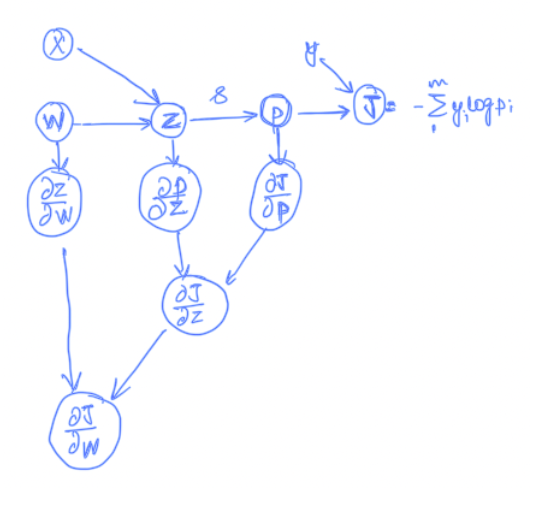



$$\frac{\partial J}{\partial w} =  \frac{\partial J}{\partial z} \frac{\partial z}{\partial w}$$

We can see from the picture that $\frac{\partial J}{\partial z}$ can be calculated using

$$\frac{\partial J}{\partial w} =  \frac{\partial J}{\partial p} \frac{\partial p}{\partial z} \frac{\partial z}{\partial w}$$

- Since, J (cost function) is the final function we want to optimise, we would come across a lot of intermediate calculations like $\frac{\partial J}{\partial <var>}$.
- In Python, we will represent gradients of J, $\frac{\partial J}{\partial w}$ as `dw`.
- And the equation $\frac{\partial J}{\partial w} =  \frac{\partial J}{\partial z} \frac{\partial z}{\partial w}$ can be represented as
$$dw =  dz  \frac{\partial z}{\partial w}$$

Since, we are moving from right to left across the computational graph, we call this process backpropagation.

<hr style="border:1px solid gray"> </hr>

### Let's calculate gradients using backpropagation

- We previously calculated $\frac{\partial z}{\partial w}$ in LR - since $z=w^Tx$, $\frac{\partial z}{\partial w}=x$
- Now, we need to calculate `dz`, $dz=\frac{\partial J}{\partial p} \frac{\partial p}{\partial z}$

Turns out that the result for `dz` has a very neat and intuitive solution (won't get into derivation)

$$dz = (p_k - I (k=y))$$

- First, the second term is called an **Indicator Function**, its 1 when `k==y`, else 0.
- Suppose `probs = [0.2, 0.3, 0.5]`, and that the correct class was the middle one  (0.3).
- According to the formula, gradients would be `dz = [0.2, -0.7, 0.5]`
- If we were saving ground truth, y,  as one-hot encoded vectors, we could have done this by just doing $p -y$

We won't go into its derivation, but lets intuitively understand this

<br>

#### Why are we subtracting 1 only from the probability of true class?
- The use of subtracting 1 from the true class is to make it derivative negative.
- For the true class (middle), increasing its probability values will decrease the error (0.3 --> -0.7) - aligns with goal.
- For other values, first and last, increase (or keeping it same) their probability values will increase the error - aligns with goal.

In [ ]:
dz = probs # dz = probabilities of class
dz[range(m),y] -= 1  # subtracting 1 from class where i == j as dz = pi - I
#dz = dz/m

$\frac{\partial z_i}{\partial w_i}$ is something we calculated earlier as well in LR, it will be equal to X.

Now, to calculate dW, we just need to multiply X with dz

In [ ]:
X.shape # shape (m, d)

(300, 2)

In [ ]:
# shape (m, n ) as we have m samples and each sample has 3 class probab.
dz.shape

(300, 3)

In [ ]:
# dW = dZ . X

dW = np.dot(X.T, dz) # check dimensions (2, 300) x (300 , 3) => (2, 3)
dW.shape

(2, 3)

In [ ]:
b.shape # shape (1, n)

(1, 3)

We know that,

$z = wx + b$

So,

- $\frac{∂z}{∂b}$ = $\frac{∂(wx + b)}{∂b}$ = 1

- as wx will be treated as constant when calculating partial derivative w.r.t b


Now,

For calculating db,

db = dz.$\frac{∂Z}{∂b}$ = dz

#### But why sum?

Since we are performing GD and not SGD,
- we'll take sum of average across all points
- we already took the average of dz (dz = dz/m)

Recall update equation of bias





<center><img src='https://drive.google.com/uc?id=1IeM-uQ6cYp-167twAm8CuEK5avjn-j68' width=600></center>




In [ ]:
db = np.sum(dz, axis=0, keepdims=True)
db.shape

(1, 3)

In [ ]:
def backprop(probs, y):
    # we know that dz = pi - I
    dz = probs # dz = pi
    dz[range(m),y] -= 1 # subtacting 1 where i ==j i.e. class label matches
    dz = dz/m # taking average as we have m points
    dW = np.dot(X.T, dz)
    db = np.sum(dz, axis=0, keepdims=True)
    return dW, db

Since, we are moving from right to left, to calculate the gradients, lets call it backproprogation

#### Once, we have the gradients, we will update the parameters

In [ ]:
lr = 0.1
W += -lr * dW
b += -lr * db

Lets put all this together in a class

In [ ]:
max_iters = 500
lr = 1

d = X.shape[1]
n = len(np.unique(y))
m = X.shape[0]
W = 0.01 * np.random.randn(d,n)
b = np.zeros((1,n))
loss_history = []

for i in range(max_iters):
    # evaluate the class probs
    z = np.dot(X, W) + b
    exp_z = np.exp(z)
    probs = exp_z/np.sum(exp_z, axis=1, keepdims=True)

    # compute the loss: average cross-entropy loss and regularization
    error = -np.log(probs[range(m), y])
    loss = np.sum(error)/m
    loss_history.append(loss)
    if i % 100 == 0:
        print(f"iteration: {i}, loss: {loss}")


    # compute the gradient on score
    dZ = probs
    dZ[range(m),y] -= 1
    dZ = dZ/m
    dW = np.dot(X.T, dZ)
    db = np.sum(dZ, axis=0, keepdims=True)

    # perform a parameter update using gradient descent
    W += -lr * dW
    b += -lr * db
# history = pd.DataFrame({'step': list(range(max_iters)), 'loss': loss_history})
# history.plot(x='step', y='loss',xlabel='step', ylabel='loss')

iteration: 0, loss: 1.0954150675874237
iteration: 100, loss: 0.7447155509295845
iteration: 200, loss: 0.7405315989722148
iteration: 300, loss: 0.7402161252089448
iteration: 400, loss: 0.7401859846894978


In [ ]:
def predict(X):
    Z = np.dot(X, W) + b
    Z_e = np.exp(Z)
    probs = Z_e/np.sum(Z_e, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

print(f"Training Accuracy {np.sum(predict(X) == y)/m}")

Training Accuracy 0.5266666666666666


We have adapted the Logistic Regression model to work for mult-class setting.

Let's plot the decision boundaries

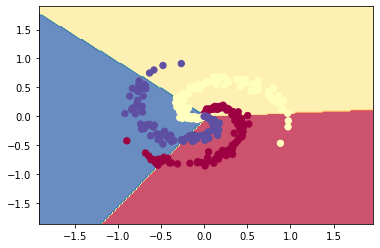

In [ ]:
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid
y_hat = predict(np.c_[xx.ravel(), yy.ravel()]) # concatenates along second axis
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

#### Softmax Classifier code wrapped in a Python class

In [ ]:
class SoftmaxClassfier:
    def __init__(self, n_features, n_outputs):
        self.d = n_features
        self.n = n_outputs
        self.W = 0.01 * np.random.randn(d,n)
        self.b = np.zeros((1,n))
        self.loss = []

    def fwdprop(self, X):
        z = np.dot(X, self.W) + self.b
        exp_z = np.exp(z)
        probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        return probs

    def cce_loss(self, probs, y):
        m = y.shape[0]
        error = -np.log(probs[range(m), y])
        return np.sum(error)/m

    def backprop(self, probs, y):
        m = y.shape[0]
        dz = probs
        dz[range(m),y] -= 1
        dz = dz/m
        dW = np.dot(X.T, dz)
        db = np.sum(dz, axis=0, keepdims=True)
        return dW, db

    def fit(self, X, y, lr=0.1, max_iters=50):

        for i in range(max_iters):
            # evaluate the class probs
            probs = self.fwdprop(X)

            # compute the loss: average cross-entropy loss and regularization
            loss = self.cce_loss(probs, y)

            # compute the gradient on score
            dW, db = self.backprop(probs, y)

            # perform a parameter update using gradient descent
            self.W += -lr * dW
            self.b += -lr * db
            self.loss.append(loss)

        self.history = pd.DataFrame({
        'step': list(range(max_iters)),
        'loss': self.loss})

    def plot_loss(self):
        return self.history.plot(x='step', y='loss',xlabel='step', ylabel='loss')

    def predict(self, X):
        probs = self.fwdprop(X)
        return np.argmax(probs, axis=1)

model = SoftmaxClassfier(n_features=2, n_outputs=3)
model.fit(X, y, lr=1, max_iters=500)
#model.plot_loss()
#print('training accuracy:', np.sum(model.predict(X) == y)/X.shape[0])

- We can see that the model has learnt three decision boundaries
- But since  haven't added any intermediate layer of neurons to create complex features, we don't expect the model to learn complex boundaries